# Receiver Operating Characteristics (ROC)

ROC curve is a commonly used metric to summarize the performance of a classifier over all possible threshold. It features **True Positive (TP)** rate on Y-axis and **False Positive (FP)** rate on X-axis.

The highest of `area under curve` **AUC** is 1 while the least is 0.5 which is represented by 45 degree random line. The higher the curve above the baseline, the better the predictions. The performance of the model is determined by looking at the area under ROC curve and the value is stored in AUC.

Steepness of the curve should also be considered as it is ideal to maximize the TP rate while minimizing the FP rate. It should be noted here that any value less than 0.5, means we should do the exact opposite of recommendation of the model to get the value more than 0.5

In [1]:
# Importing necessary packages and dataset
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import load_breast_cancer

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load and read the dataset
cancer = load_breast_cancer()

In [3]:
# Train-Test split
x_trg, x_test, y_trg, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [4]:
# Model Building - Naive Bayes
naive_cancer = GaussianNB()

# Fit the model
naive_cancer.fit(x_trg, y_trg)

GaussianNB()

In [5]:
# Prediction
cancer_pred = naive_cancer.predict(x_test)

In [6]:
cancer_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [7]:
# Calcuate the ROC score from the orignial data and predicted 
cancer_auc = roc_auc_score(y_test, cancer_pred)

In [8]:
cancer_auc

0.9306079664570233

In [9]:
# Determine the FP and TP rates from the ROC curve
cancer_fpr, cancer_tpr, _ = roc_curve(y_test, cancer_pred)

In [10]:
cancer_fpr

array([0.        , 0.09433962, 1.        ])

In [11]:
cancer_tpr

array([0.        , 0.95555556, 1.        ])

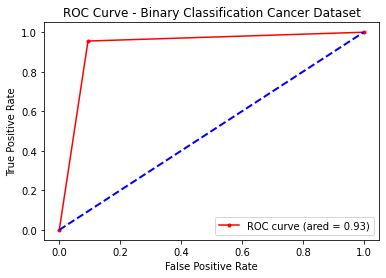

In [12]:
# Plot the ROC curve for the model
plt.plot(cancer_fpr, cancer_tpr, color = "red", marker = ".", label = "ROC curve (ared = %0.2f)" %cancer_auc)

# Plot the straight line for the model
plt.plot([0,1], [0,1], color = "blue", lw = 2, linestyle = "--")

# Defining the axis labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Binary Classification Cancer Dataset")

# Legend display
plt.legend(loc = "lower right")

# Show the plot
plt.show()

This is the binary classification problem with ROC curve showing the accuracy of model is 0.93 which is excellent.